In [ ]:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [1]:
import keras
import os
import numpy as np
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
target_height = 64
target_width  = 64
target_channel = 3

In [3]:
data_version_number = '0_1'

In [4]:
TRAIN_PATH = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/train_' + data_version_number + '/'
VALIDATION_PATH = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/validation_' + data_version_number + '/'
TEST_PATH  = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/test_' + data_version_number + '/'

In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(target_height, target_width, target_channel)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [21]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
activation_6 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
activation_7 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
__________

In [12]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

history = keras.callbacks.History()

In [13]:
train_generator = train_datagen.flow_from_directory(TRAIN_PATH, 
                                                    target_size = (target_height, target_width)
#                                                     color_mode = 'grayscale'
                                                   )

validation_generator = test_datagen.flow_from_directory(VALIDATION_PATH, 
                                                    target_size = (target_height, target_width)
#                                                     color_mode = 'grayscale'
                                                   )

Found 342 images belonging to 10 classes.
Found 114 images belonging to 10 classes.


In [14]:
history = model.fit_generator(train_generator, 
                              validation_data = validation_generator,
                              epochs = 50,
                              callbacks=[history]
                             )

Epoch 1/50
11/11 [==============================] - ETA: 9s - loss: 8.0973 - acc: 0.0000e+0 - ETA: 6s - loss: 6.3589 - acc: 0.0625    - ETA: 5s - loss: 6.7869 - acc: 0.062 - ETA: 4s - loss: 6.8696 - acc: 0.070 - ETA: 3s - loss: 7.4087 - acc: 0.068 - ETA: 3s - loss: 7.6597 - acc: 0.083 - ETA: 2s - loss: 7.6497 - acc: 0.080 - ETA: 1s - loss: 7.7372 - acc: 0.078 - ETA: 1s - loss: 7.9484 - acc: 0.074 - ETA: 0s - loss: 8.0948 - acc: 0.073 - 8s 754ms/step - loss: 7.9277 - acc: 0.0724 - val_loss: 7.6982 - val_acc: 0.1228
Epoch 2/50
11/11 [==============================] - ETA: 5s - loss: 9.8603 - acc: 0.031 - ETA: 4s - loss: 9.1832 - acc: 0.062 - ETA: 3s - loss: 8.9690 - acc: 0.072 - ETA: 3s - loss: 8.6249 - acc: 0.093 - ETA: 2s - loss: 9.0868 - acc: 0.075 - ETA: 2s - loss: 8.7052 - acc: 0.072 - ETA: 1s - loss: 8.4802 - acc: 0.080 - ETA: 1s - loss: 8.2626 - acc: 0.093 - ETA: 1s - loss: 8.0238 - acc: 0.093 - ETA: 0s - loss: 8.0901 - acc: 0.093 - 10s 881ms/step - loss: 8.0042 - acc: 0.0911 - va

Epoch 17/50
11/11 [==============================] - ETA: 5s - loss: 1.9909 - acc: 0.156 - ETA: 4s - loss: 1.9256 - acc: 0.187 - ETA: 3s - loss: 1.8438 - acc: 0.229 - ETA: 3s - loss: 1.8486 - acc: 0.265 - ETA: 2s - loss: 1.8399 - acc: 0.275 - ETA: 2s - loss: 1.9289 - acc: 0.234 - ETA: 1s - loss: 1.8847 - acc: 0.281 - ETA: 1s - loss: 1.8424 - acc: 0.312 - ETA: 0s - loss: 1.8136 - acc: 0.323 - ETA: 0s - loss: 1.7908 - acc: 0.328 - 7s 668ms/step - loss: 1.7652 - acc: 0.3325 - val_loss: 1.9894 - val_acc: 0.3684
Epoch 18/50
11/11 [==============================] - ETA: 5s - loss: 2.3614 - acc: 0.312 - ETA: 4s - loss: 2.2300 - acc: 0.250 - ETA: 3s - loss: 2.0725 - acc: 0.270 - ETA: 3s - loss: 1.9545 - acc: 0.281 - ETA: 2s - loss: 1.8909 - acc: 0.306 - ETA: 2s - loss: 1.8922 - acc: 0.286 - ETA: 1s - loss: 1.8633 - acc: 0.312 - ETA: 1s - loss: 1.8337 - acc: 0.312 - ETA: 1s - loss: 1.8044 - acc: 0.316 - ETA: 0s - loss: 1.7747 - acc: 0.319 - 8s 724ms/step - loss: 1.8354 - acc: 0.3268 - val_loss:

Epoch 33/50
11/11 [==============================] - ETA: 4s - loss: 1.0779 - acc: 0.687 - ETA: 3s - loss: 1.0269 - acc: 0.661 - ETA: 3s - loss: 0.9786 - acc: 0.680 - ETA: 2s - loss: 0.9647 - acc: 0.682 - ETA: 2s - loss: 0.9057 - acc: 0.689 - ETA: 2s - loss: 0.8894 - acc: 0.658 - ETA: 1s - loss: 0.9151 - acc: 0.662 - ETA: 1s - loss: 0.9276 - acc: 0.649 - ETA: 1s - loss: 0.9270 - acc: 0.636 - ETA: 0s - loss: 0.9213 - acc: 0.638 - 7s 681ms/step - loss: 0.9451 - acc: 0.6260 - val_loss: 1.8108 - val_acc: 0.4035
Epoch 34/50
11/11 [==============================] - ETA: 4s - loss: 0.8888 - acc: 0.718 - ETA: 4s - loss: 0.8880 - acc: 0.671 - ETA: 3s - loss: 0.8442 - acc: 0.656 - ETA: 3s - loss: 0.9326 - acc: 0.648 - ETA: 2s - loss: 0.9616 - acc: 0.643 - ETA: 2s - loss: 0.9661 - acc: 0.651 - ETA: 1s - loss: 1.0435 - acc: 0.647 - ETA: 1s - loss: 1.0275 - acc: 0.644 - ETA: 0s - loss: 1.0142 - acc: 0.648 - ETA: 0s - loss: 1.0012 - acc: 0.643 - 7s 672ms/step - loss: 0.9816 - acc: 0.6443 - val_loss:

Epoch 49/50
11/11 [==============================] - ETA: 5s - loss: 0.3214 - acc: 0.906 - ETA: 4s - loss: 0.3297 - acc: 0.890 - ETA: 4s - loss: 0.3872 - acc: 0.875 - ETA: 3s - loss: 0.5523 - acc: 0.828 - ETA: 3s - loss: 0.6770 - acc: 0.806 - ETA: 2s - loss: 0.6641 - acc: 0.802 - ETA: 2s - loss: 0.6600 - acc: 0.790 - ETA: 1s - loss: 0.6333 - acc: 0.796 - ETA: 1s - loss: 0.6029 - acc: 0.799 - ETA: 0s - loss: 0.5827 - acc: 0.809 - 9s 806ms/step - loss: 0.5627 - acc: 0.8159 - val_loss: 1.6407 - val_acc: 0.6316
Epoch 50/50
11/11 [==============================] - ETA: 3s - loss: 0.2611 - acc: 0.909 - ETA: 3s - loss: 0.3391 - acc: 0.876 - ETA: 3s - loss: 0.2763 - acc: 0.907 - ETA: 3s - loss: 0.2722 - acc: 0.907 - ETA: 2s - loss: 0.2821 - acc: 0.900 - ETA: 2s - loss: 0.3592 - acc: 0.870 - ETA: 1s - loss: 0.3778 - acc: 0.870 - ETA: 1s - loss: 0.3820 - acc: 0.879 - ETA: 1s - loss: 0.3762 - acc: 0.878 - ETA: 0s - loss: 0.3854 - acc: 0.872 - 9s 774ms/step - loss: 0.3967 - acc: 0.8695 - val_loss:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


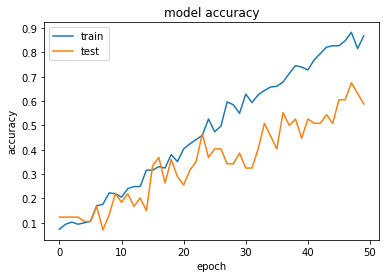

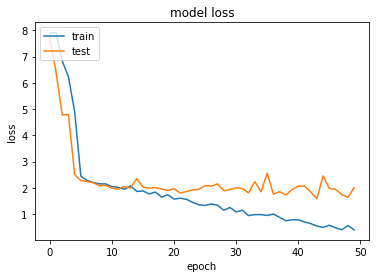

In [15]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.legend(['train'], loc='upper left')
plt.show()

In [16]:
history.history['loss']

[7.881919793915331,
 7.925883176033957,
 6.8405193724827456,
 6.227945166024548,
 4.909301799640321,
 2.4464697991198268,
 2.283248431501333,
 2.2044990662245723,
 2.1547631436621235,
 2.1515780150541786,
 2.0487790079841837,
 2.0224752314606604,
 1.9442821538936326,
 2.0765232273012573,
 1.8657693953541985,
 1.8856790581641838,
 1.770049344029343,
 1.8407331956060309,
 1.6479196485720182,
 1.7389825833471197,
 1.5746033240480033,
 1.607613279805546,
 1.566777103128489,
 1.4496326669614914,
 1.3564188550090233,
 1.3314688129034655,
 1.3873686065450745,
 1.3414234320322673,
 1.1508883300580477,
 1.2534006558663664,
 1.0842599548094454,
 1.1515220626752976,
 0.9443087372166371,
 0.9836042432757149,
 0.9837567011515299,
 0.9509865606737415,
 1.00312760629152,
 0.8805139821175246,
 0.7484325017148291,
 0.7870824110438253,
 0.7861000686361078,
 0.7018771621218899,
 0.6418808587113319,
 0.5477022654131839,
 0.4964777081333406,
 0.5770071100073251,
 0.48268553283479476,
 0.4057151732737558,
 

In [19]:
from keras.utils import plot_model
plot_model(model)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
activation_6 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
activation_7 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
__________